In [6]:
stackloss #data set opening
mystackloss <- as.data.frame(stackloss) #frame creation
mystackloss
summary.data.frame(mystackloss) #descriptive statistics
cor(mystackloss) #correlation matrix
stat.desc(mystackloss) #package "pastecs"

Air.Flow,Water.Temp,Acid.Conc.,stack.loss
<dbl>,<dbl>,<dbl>,<dbl>
80,27,89,42
80,27,88,37
75,25,90,37
62,24,87,28
62,22,87,18
62,23,87,18
62,24,93,19
62,24,93,20
58,23,87,15


Air.Flow,Water.Temp,Acid.Conc.,stack.loss
<dbl>,<dbl>,<dbl>,<dbl>
80,27,89,42
80,27,88,37
75,25,90,37
62,24,87,28
62,22,87,18
62,23,87,18
62,24,93,19
62,24,93,20
58,23,87,15


    Air.Flow       Water.Temp     Acid.Conc.      stack.loss   
 Min.   :50.00   Min.   :17.0   Min.   :72.00   Min.   : 7.00  
 1st Qu.:56.00   1st Qu.:18.0   1st Qu.:82.00   1st Qu.:11.00  
 Median :58.00   Median :20.0   Median :87.00   Median :15.00  
 Mean   :60.43   Mean   :21.1   Mean   :86.29   Mean   :17.52  
 3rd Qu.:62.00   3rd Qu.:24.0   3rd Qu.:89.00   3rd Qu.:19.00  
 Max.   :80.00   Max.   :27.0   Max.   :93.00   Max.   :42.00  

,Air.Flow,Water.Temp,Acid.Conc.,stack.loss
Air.Flow,1.0000000,0.7818523,0.5001429,0.9196635
Water.Temp,0.7818523,1.0000000,0.3909395,0.8755044
Acid.Conc.,0.5001429,0.3909395,1.0000000,0.3998296
stack.loss,0.9196635,0.8755044,0.3998296,1.0000000


ERROR: Error in stat.desc(mystackloss): could not find function "stat.desc"


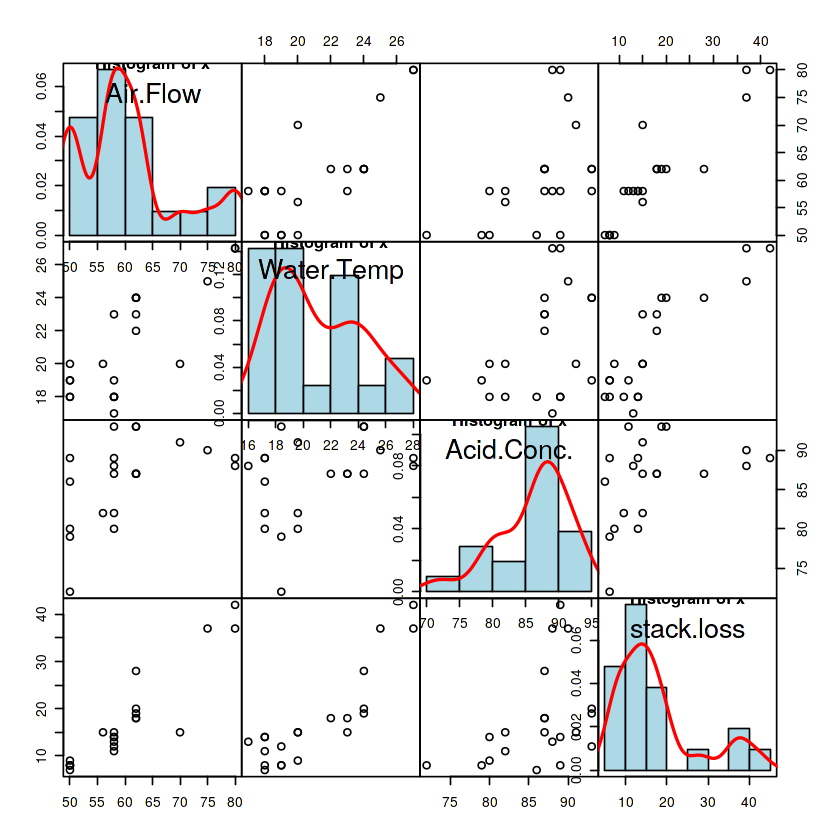

In [8]:
#matrix diagram
x <- mystackloss
pairs(x, gap=0, diag.panel=function(x) {
  par(new=TRUE)
  hist(x, col="light blue", probability=TRUE)
  lines(density(x), col="red", lwd=2)
})

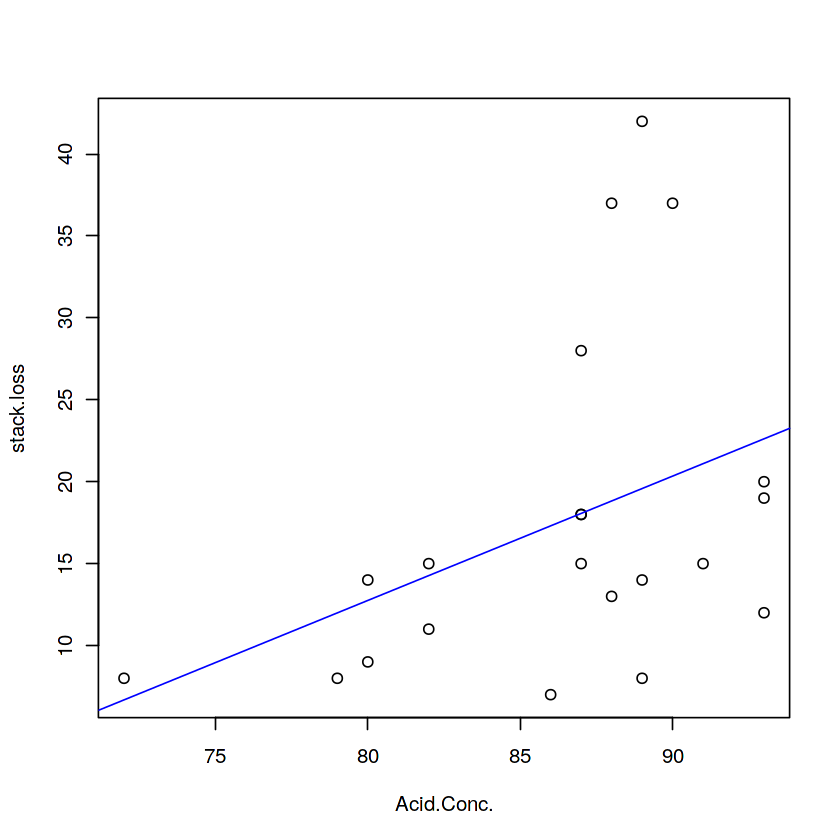

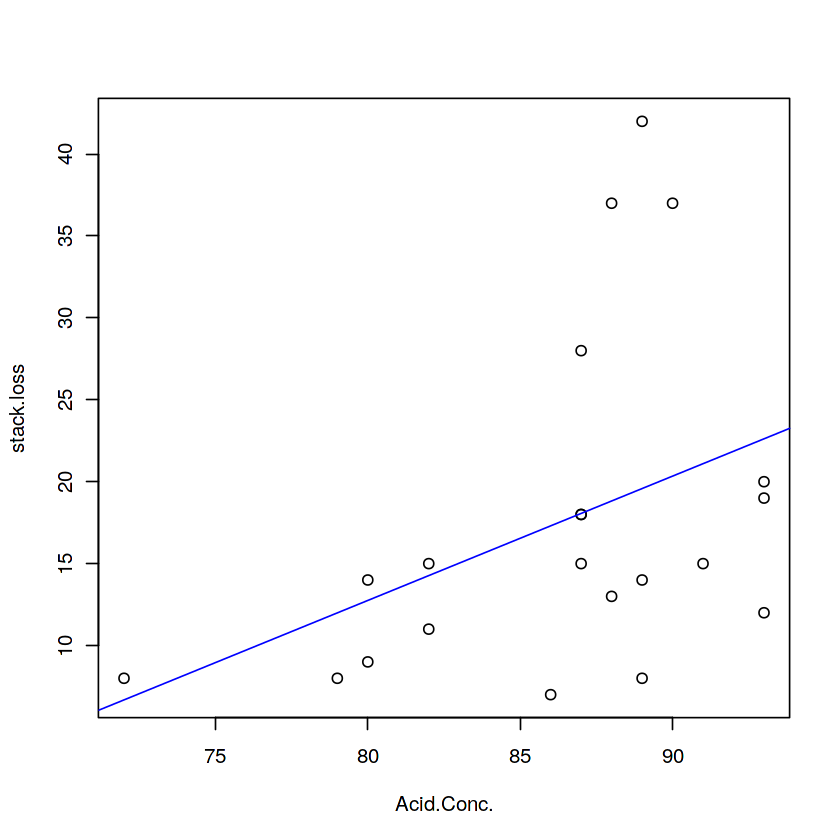

In [9]:
# scatterplot & regression line
plot(stack.loss~Acid.Conc., data=mystackloss)
abline(lm(stack.loss~Acid.Conc., data=mystackloss), col="blue", lwd=1)
plot(stack.loss~Acid.Conc., data=mystackloss)
abline(lm(stack.loss~Acid.Conc., data=mystackloss), col="blue", lwd=1)

In [10]:
#pair regression 1 stack.loss~Air.Flow
lm.st1 <- lm(formula=stack.loss~Air.Flow, data=mystackloss)
lm.st1$coefficients
summary(lm.st1)

(Intercept)    Air.Flow 
 -44.132025    1.020309


Call:
lm(formula = stack.loss ~ Air.Flow, data = mystackloss)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2896  -1.1272  -0.0459   1.1166   8.8728 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -44.13202    6.10586  -7.228 7.31e-07 ***
Air.Flow      1.02031    0.09995  10.208 3.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.098 on 19 degrees of freedom
Multiple R-squared:  0.8458,	Adjusted R-squared:  0.8377 
F-statistic: 104.2 on 1 and 19 DF,  p-value: 3.774e-09


In [7]:
#analysis of variance table
anova(lm.st1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Air.Flow,1,1750.1220,1750.12199,104.2013,3.774296e-09
Residuals,19,319.1161,16.79558,NA,NA


In [8]:
#Confidence Interval & Predicted Interval (CI & PI)
CPI.df <- cbind(predict(lm.st1, interval="conf"),
                predict(lm.st1, interval="pred"))
CPI.df <- CPI.df[,-4]
colnames(CPI.df) <- c("Y_fit","CI_l","CI_u","PI_l","PI_u")
head(CPI.df)

Warning message in predict.lm(lm.st1, interval = "pred"):
“predictions on current data refer to _future_ responses
”

,Y_fit,CI_l,CI_u,PI_l,PI_u
1,37.49272,32.99073,41.99471,27.80535,47.18009
2,37.49272,32.99073,41.99471,27.80535,47.18009
3,32.39117,28.81397,35.96838,23.09743,41.68492
4,19.12715,17.22669,21.02761,10.34143,27.91288
5,19.12715,17.22669,21.02761,10.34143,27.91288
6,19.12715,17.22669,21.02761,10.34143,27.91288


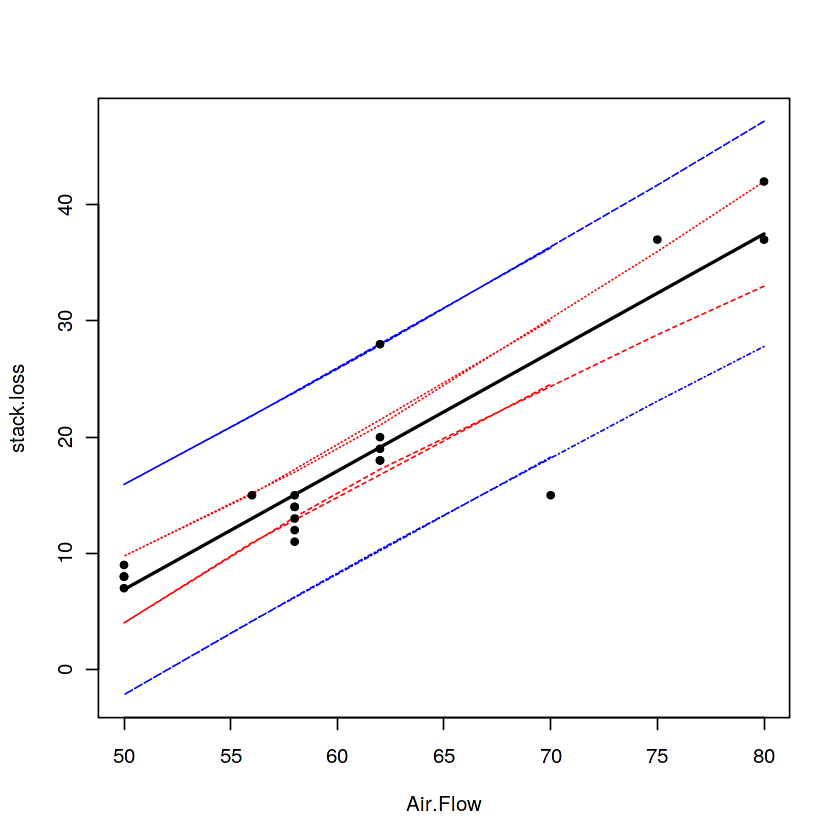

In [9]:
#regression 1 line with CI&PI
matplot(mystackloss$Air.Flow, CPI.df,
        type="l", lwd=c(2,1,1,1,1), col=c(1,2,2,4,4),
        ylab="stack.loss", xlab="Air.Flow")
with(mystackloss, matpoints(Air.Flow, stack.loss, pch=20))

In [10]:
#pair regression 2 stack.loss~Acid.Conc.
lm.st2 <- lm(formula=stack.loss~Acid.Conc., data=mystackloss)
lm.st2$coefficients
summary(lm.st2)

(Intercept)  Acid.Conc. 
-47.9631841   0.7589552


Call:
lm(formula = stack.loss ~ Acid.Conc., data = mystackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.584  -5.584  -3.066   1.247  22.416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -47.9632    34.5044  -1.390   0.1806  
Acid.Conc.    0.7590     0.3992   1.901   0.0725 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.565 on 19 degrees of freedom
Multiple R-squared:  0.1599,	Adjusted R-squared:  0.1156 
F-statistic: 3.615 on 1 and 19 DF,  p-value: 0.07252


In [11]:
#analysis of Variance Table
anova(lm.st2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Acid.Conc.,1,330.7961,330.79606,3.615378,0.072523
Residuals,19,1738.4420,91.49695,NA,NA


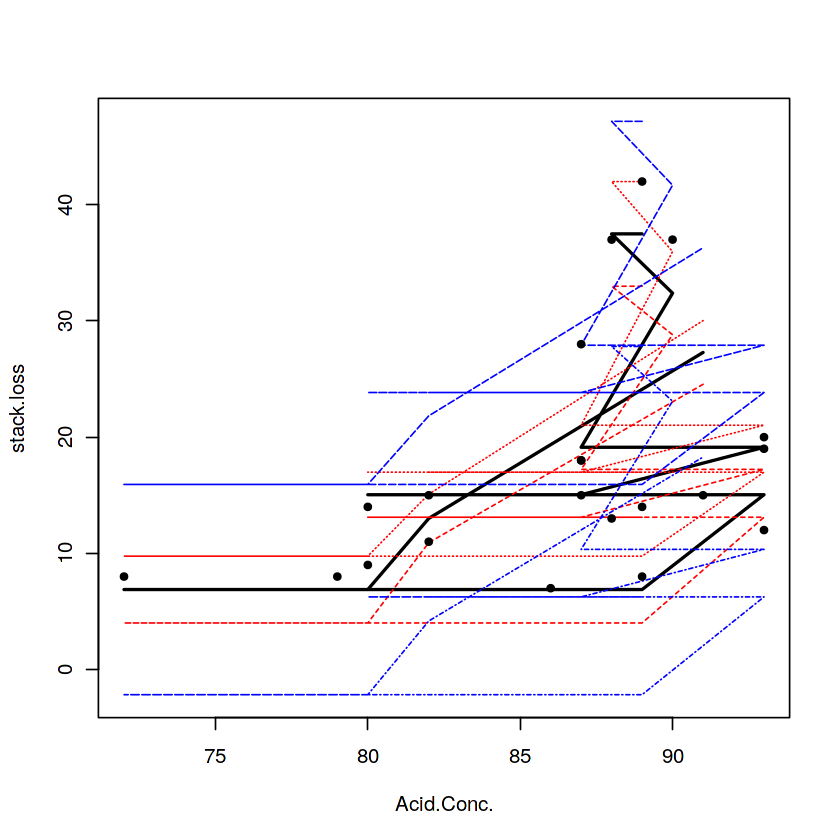

In [12]:
#regression 2 line with CI&PI
matplot(mystackloss$Acid.Conc., CPI.df,
        type="l", lwd=c(2,1,1,1,1), col=c(1,2,2,4,4),
        ylab="stack.loss", xlab="Acid.Conc.")
with(mystackloss, matpoints(Acid.Conc., stack.loss, pch=20))

In [13]:
#multiply linear regression stack.loss~.
summary(fm1 <- lm(stack.loss ~ ., data=mystackloss))
anova(fm1)
tabout <- cbind(mystackloss$stack.loss, predict.lm(fm1))
head(tabout, n=21)


Call:
lm(formula = stack.loss ~ ., data = mystackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2377 -1.7117 -0.4551  2.3614  5.6978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39.9197    11.8960  -3.356  0.00375 ** 
Air.Flow      0.7156     0.1349   5.307  5.8e-05 ***
Water.Temp    1.2953     0.3680   3.520  0.00263 ** 
Acid.Conc.   -0.1521     0.1563  -0.973  0.34405    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.243 on 17 degrees of freedom
Multiple R-squared:  0.9136,	Adjusted R-squared:  0.8983 
F-statistic:  59.9 on 3 and 17 DF,  p-value: 3.016e-09


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Air.Flow,1,1750.121989,1750.121989,166.3707443,3.308729e-10
Water.Temp,1,130.320772,130.320772,12.3886015,2.629043e-03
Acid.Conc.,1,9.965372,9.965372,0.9473319,3.440461e-01
Residuals,17,178.829962,10.519410,NA,NA


1,42,38.765363
2,37,38.917485
3,37,32.444467
4,28,22.302226
5,18,19.711654
6,18,21.006940
7,19,21.389491
8,20,21.389491
9,15,18.144379
10,14,12.732806
11,14,11.363703


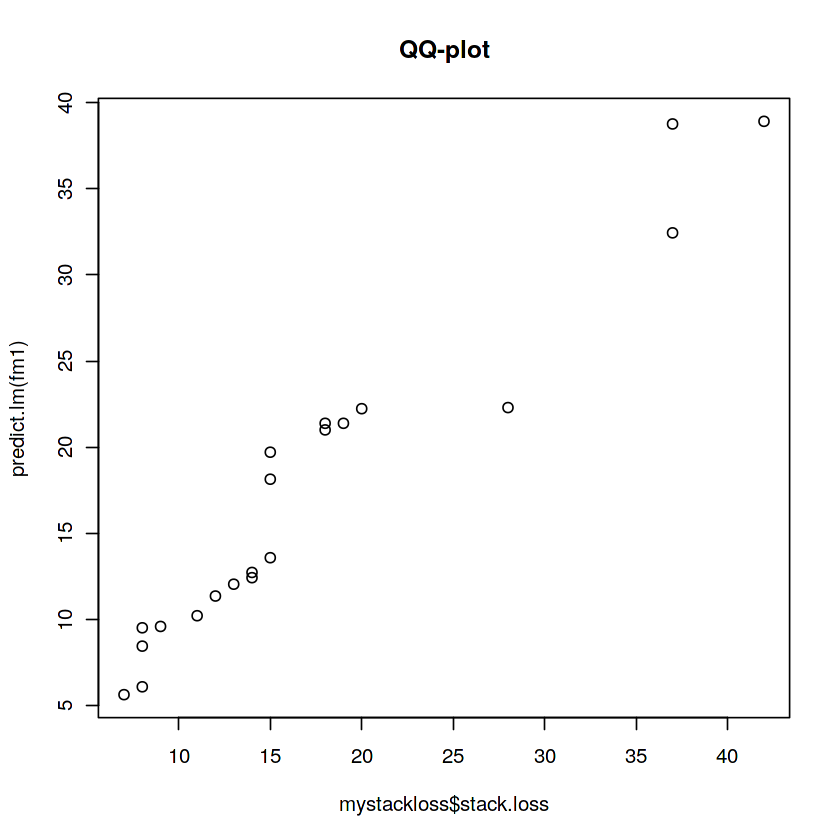

In [14]:
qqplot(mystackloss$stack.loss, predict.lm(fm1), main="QQ-plot")

In [15]:
#regression by step
summary(fm2 <- step(lm(stack.loss~., data=mystackloss)))
anova(fm2)
tabout2 <- cbind(mystackloss$stack.loss, predict.lm(fm2))
head(tabout2, n=21)

Start:  AIC=52.98
stack.loss ~ Air.Flow + Water.Temp + Acid.Conc.

             Df Sum of Sq    RSS    AIC
- Acid.Conc.  1     9.965 188.80 52.119
<none>                    178.83 52.980
- Water.Temp  1   130.308 309.14 62.475
- Air.Flow    1   296.228 475.06 71.497

Step:  AIC=52.12
stack.loss ~ Air.Flow + Water.Temp

             Df Sum of Sq    RSS    AIC
<none>                    188.80 52.119
- Water.Temp  1    130.32 319.12 61.142
- Air.Flow    1    294.36 483.15 69.852



Call:
lm(formula = stack.loss ~ Air.Flow + Water.Temp, data = mystackloss)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5290 -1.7505  0.1894  2.1156  5.6588 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50.3588     5.1383  -9.801 1.22e-08 ***
Air.Flow      0.6712     0.1267   5.298 4.90e-05 ***
Water.Temp    1.2954     0.3675   3.525  0.00242 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.239 on 18 degrees of freedom
Multiple R-squared:  0.9088,	Adjusted R-squared:  0.8986 
F-statistic: 89.64 on 2 and 18 DF,  p-value: 4.382e-10


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Air.Flow,1,1750.1220,1750.12199,166.85897,1.527894e-10
Water.Temp,1,130.3208,130.32077,12.42496,2.419146e-03
Residuals,18,188.7953,10.48863,NA,NA


1,42,38.308002
2,37,38.308002
3,37,32.361527
4,28,22.341168
5,18,19.750465
6,18,21.045817
7,19,22.341168
8,20,22.341168
9,15,18.361199
10,14,11.884442
11,14,11.884442


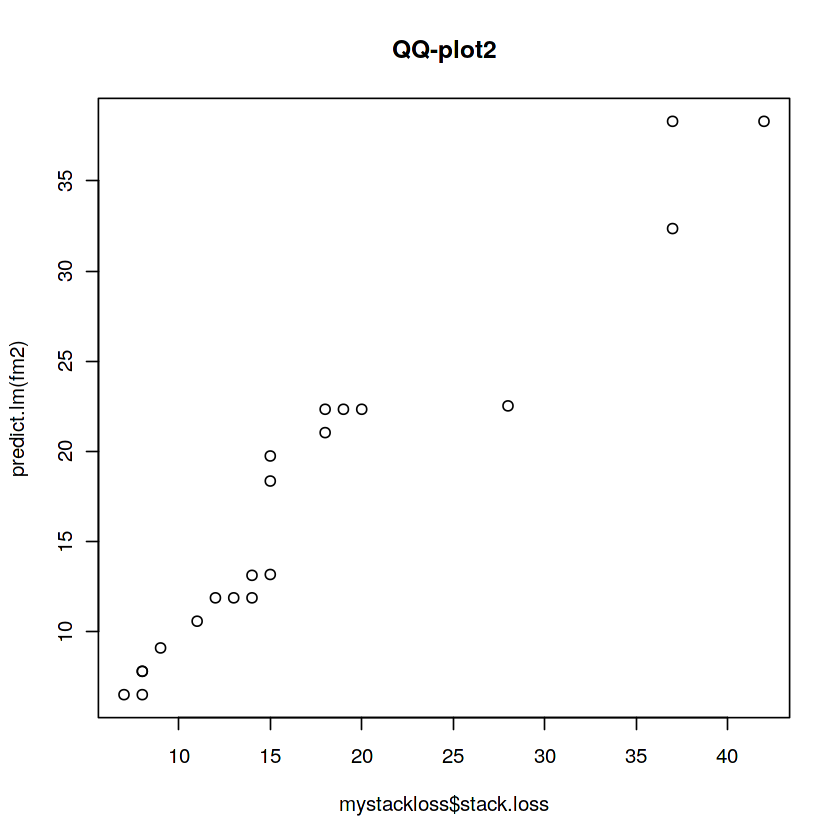

In [16]:
qqplot(mystackloss$stack.loss, predict.lm(fm2), main="QQ-plot2")